In [120]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ConfusionMatrix

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils

import numpy as np
np.set_printoptions(suppress=True)
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
#https://elitedatascience.com/keras-tutorial-deep-learning-in-python

# Importar Dataset de imagens de caracteres

In [84]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
(X1_train,y1_train) = (X_train,y_train)

# Analisar Dataset

In [85]:
type(X_train),type(y_train)

(numpy.ndarray, numpy.ndarray)

In [86]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [87]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [88]:
y_train[0]

5

# Plotar item

In [89]:
#X_train[0, :, :]

In [90]:
plt.rcParams['figure.figsize'] = 3,3

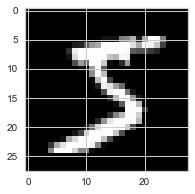

In [91]:
plt.imshow(X_train[0, :, :],cmap='gray')

In [92]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [93]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

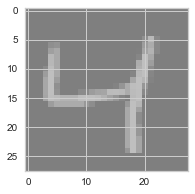

In [94]:
plt.imshow(X_train[2, :, :]/4+127,cmap='gray',vmin=0,vmax=255)

In [95]:
print(X_train.shape)
X_train = X_train.reshape(len(X_train),np.prod(X_train.shape[1:]))
print(X_train.shape)                          

(60000, 28, 28)
(60000, 784)


In [96]:
print(X_test.shape)
X_test = X_test.reshape(len(X_test),np.prod(X_test.shape[1:]))
print(X_test.shape)       

(10000, 28, 28)
(10000, 784)


## Normalizar e resolver compatibilidade entre python 2 e 3

In [97]:
X_train.astype('float32')
X_train =X_train / 255

In [98]:
X_test.astype('float32')
X_test = X_test /255

In [99]:
from keras.utils import to_categorical

## Para o Keras precisa estar em dummy categorical a variavel de saida

In [100]:
y_train = to_categorical(y_train,10)

In [101]:
y_test = to_categorical(y_test,10)

In [102]:
X_train.shape,y_train.shape

((60000, 784), (60000, 10))

In [103]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Criar Rede

In [104]:
# units (neuronios camada escondida)
# input_dim (atributos previsores)
modelo = Sequential()

# Primeira camada de neuronios
modelo.add(Dense(units=64, 
                 activation='relu',
                 input_dim=784))
# Camada de dropout (Zera o valor de alguns neuronios para evitar overfiting)
# 0.3 vai zerar 30% dos valores
modelo.add(Dropout(0.3))


# Segunda camada de neuronios
modelo.add(Dense(units=64, 
                 activation='relu'))
modelo.add(Dropout(0.3))

# Terceira camada de neuronios
modelo.add(Dense(units=64, 
                 activation='relu'))
modelo.add(Dropout(0.3))

# Camada de saida units=10 pq tenho 10 classes
# activation='softmax' pois tenho várias categorias na saída
modelo.add(Dense(units=10,activation='softmax'))

In [105]:
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)               

In [106]:
# necessita ter instalado o graphviz
from keras.utils.vis_utils import plot_model

### Treinar rede

In [107]:
modelo.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics =['accuracy'])
hist = modelo.fit( X_train,
                   y_train,
                  epochs = 15,
                  validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 64us/step - loss: 0.5780 - accuracy: 0.8234 - val_loss: 0.1975 - val_accuracy: 0.9413
Epoch 2/15
60000/60000 [==============================] - 4s 61us/step - loss: 0.3101 - accuracy: 0.9120 - val_loss: 0.1715 - val_accuracy: 0.9505
Epoch 3/15
60000/60000 [==============================] - 4s 62us/step - loss: 0.2617 - accuracy: 0.9262 - val_loss: 0.1378 - val_accuracy: 0.9605
Epoch 4/15
60000/60000 [==============================] - 4s 61us/step - loss: 0.2327 - accuracy: 0.9340 - val_loss: 0.1295 - val_accuracy: 0.9637
Epoch 5/15
60000/60000 [==============================] - 4s 64us/step - loss: 0.2189 - accuracy: 0.9388 - val_loss: 0.1254 - val_accuracy: 0.9643
Epoch 6/15
60000/60000 [==============================] - 4s 62us/step - loss: 0.2035 - accuracy: 0.9427 - val_loss: 0.1124 - val_accuracy: 0.9676
Epoch 7/15
60000/60000 [==============================] - 4s 62us/st

### Gráfico loss

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


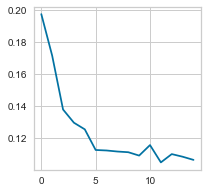

In [108]:
print(hist.history.keys())
plt.plot(hist.history['val_loss'])

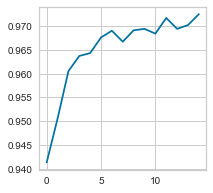

In [109]:
plt.plot(hist.history['val_accuracy'])

### Gerar matriz dde confusoes

In [110]:
previsoes = modelo.predict(X_test)
previsoes = (previsoes > 0.5)

In [111]:
y_test_matrix = [np.argmax(t) for t in y_test]
y_previsao_matrix = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_test_matrix,y_previsao_matrix)
print(confusao)

[[ 973    0    0    1    0    1    2    1    2    0]
 [   4 1117    3    2    0    0    2    2    5    0]
 [  14    0  993    8    4    0    2    8    3    0]
 [   9    0    5  984    0    3    0    8    1    0]
 [   4    0    2    0  951    0    4    2    2   17]
 [  13    0    0   13    1  855    3    2    3    2]
 [   9    2    0    0    6    5  933    0    3    0]
 [   5    2    7    3    0    0    0 1008    0    3]
 [  24    2    3    6    4    5    3    3  917    7]
 [  10    4    0   10   14    2    0    5    1  963]]


# Verificar se acertou o valor para um registro

In [119]:
print(y_train[20])
novo = X_train[20]
novo = np.expand_dims(novo,axis= 0)
pred = modelo.predict(novo)
print(pred.dtype)
print(pred)

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
float32
[[0.         0.         0.00000122 0.         0.99999714 0.
  0.         0.         0.         0.00000162]]


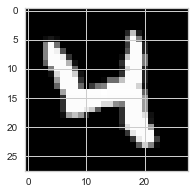

In [116]:
plt.imshow(X1_train[20, :, :],cmap='gray')